In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
#Loading Dataset
print("Loading CNN/DailyMail dataset ..")
dataset = load_dataset('abisee/cnn_dailymail', '3.0.0')

print(f"\nDataset splits:")
print(f"  - Train: {len(dataset['train'])} samples")
print(f"  - Validation: {len(dataset['validation'])} samples")
print(f"  - Test: {len(dataset['test'])} samples")

Loading CNN/DailyMail dataset ..

Dataset splits:
  - Train: 287113 samples
  - Validation: 13368 samples
  - Test: 11490 samples


In [3]:
# Vieweing Sample
sample = dataset['test'][0]

print("=" * 70)
print("SAMPLE ARTICLE:")
print("=" * 70)
print(sample['article'][:500] + "...")
print("\n" + "=" * 70)
print("REFERENCE SUMMARY:")
print("=" * 70)
print(sample['highlights'])

SAMPLE ARTICLE:
(CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC's founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, includin...

REFERENCE SUMMARY:
Membership gives the ICC jurisdiction over alleged crimes committed in Palestinian territories since last June .
Israel and the United States opposed the move, which could open the door to war crimes investigations against Israelis .


In [4]:
# Analysing length distribution
test_samples = dataset['test'].select(range(min(11000, len(dataset['test']))))

article_lengths = [len(article.split()) for article in test_samples['article']]
summary_lengths = [len(summary.split()) for summary in test_samples['highlights']]

# Creating Dataframe
df = pd.DataFrame({
    'Article Length': article_lengths,
    'Summary Length': summary_lengths,
    'Compression Ratio': np.array(summary_lengths) / np.array(article_lengths)
})

print("\n Length Statistics: ")
print(df.describe())



 Length Statistics: 
       Article Length  Summary Length  Compression Ratio
count    11000.000000    11000.000000       11000.000000
mean       680.276545       54.789091           0.100635
std        348.646984       22.580713           0.095983
min         55.000000        9.000000           0.010490
25%        416.000000       40.000000           0.059533
50%        610.000000       51.000000           0.086446
75%        873.000000       63.000000           0.125000
max       1919.000000      564.000000           7.593750


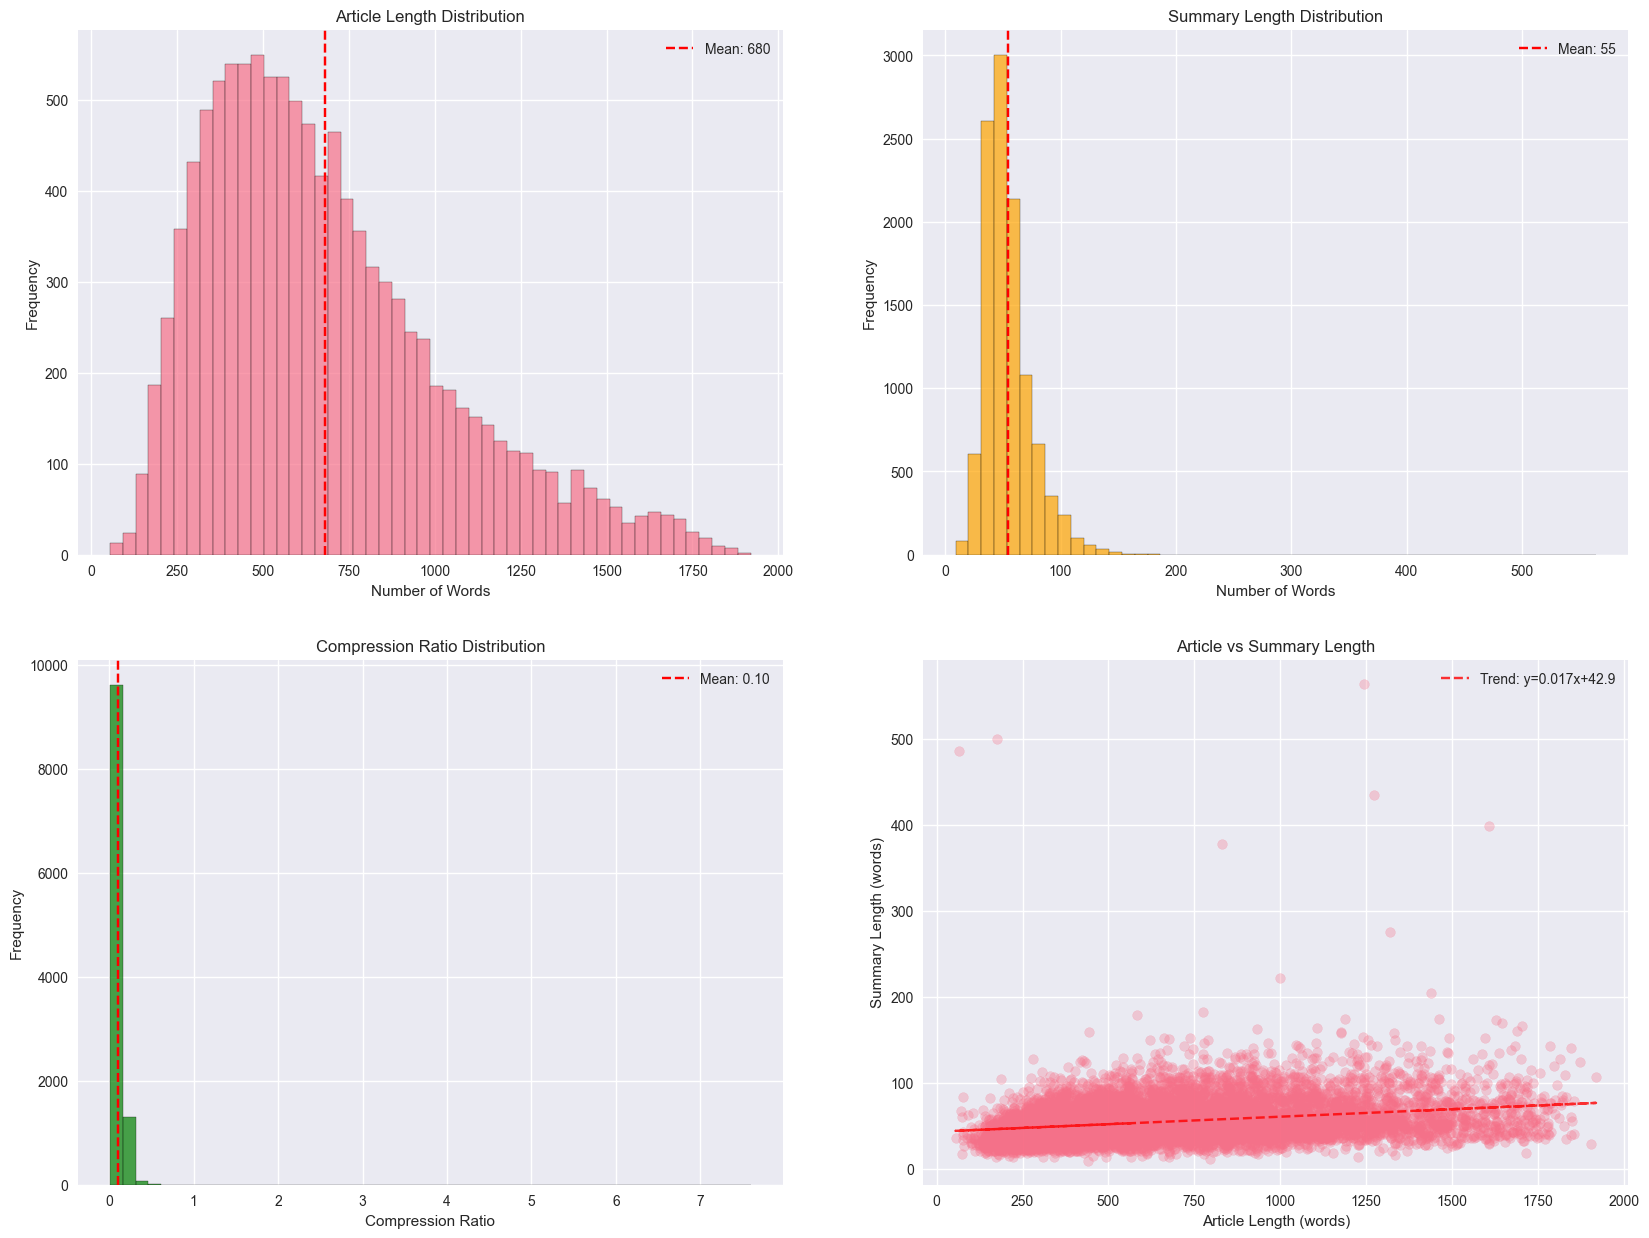

In [5]:
# Visualizing length distributions
fig, axes = plt.subplots(2, 2, figsize = (20,15))

#Article Length Distribution
axes[0, 0].hist(article_lengths, bins= 50, edgecolor= 'black', alpha = 0.7)
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Article Length Distribution')
axes[0, 0].axvline(np.mean(article_lengths), color='red', linestyle='--', 
                    label=f'Mean: {np.mean(article_lengths):.0f}')
axes[0, 0].legend()

# Summary length distribution
axes[0, 1].hist(summary_lengths, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Number of Words')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Summary Length Distribution')
axes[0, 1].axvline(np.mean(summary_lengths), color='red', linestyle='--',
                    label=f'Mean: {np.mean(summary_lengths):.0f}')
axes[0, 1].legend()

# Compression ratio distribution
axes[1, 0].hist(df['Compression Ratio'], bins=50, edgecolor='black', 
                alpha=0.7, color='green')
axes[1, 0].set_xlabel('Compression Ratio')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Compression Ratio Distribution')
axes[1, 0].axvline(np.mean(df['Compression Ratio']), color='red', 
                    linestyle='--', label=f'Mean: {np.mean(df["Compression Ratio"]):.2f}')
axes[1, 0].legend()

# Scatter plot
axes[1, 1].scatter(article_lengths, summary_lengths, alpha=0.3)
axes[1, 1].set_xlabel('Article Length (words)')
axes[1, 1].set_ylabel('Summary Length (words)')
axes[1, 1].set_title('Article vs Summary Length')

# Add trend line
z = np.polyfit(article_lengths, summary_lengths, 1)
p = np.poly1d(z)
axes[1, 1].plot(article_lengths, p(article_lengths), "r--", alpha=0.8, 
                label=f'Trend: y={z[0]:.3f}x+{z[1]:.1f}')
axes[1, 1].legend()

In [6]:

# Cell 6: Key Insights
print("\n" + "=" * 70)
print("KEY INSIGHTS:")
print("=" * 70)
print(f"1. Average article length: {np.mean(article_lengths):.0f} words")
print(f"2. Average summary length: {np.mean(summary_lengths):.0f} words")
print(f"3. Average compression ratio: {np.mean(df['Compression Ratio']):.2%}")
print(f"4. Ideal summary should be: {np.mean(df['Compression Ratio'])*100:.0f}% of original")
print(f"5. Most articles are: {np.median(article_lengths):.0f} words (median)")
print("=" * 70)



KEY INSIGHTS:
1. Average article length: 680 words
2. Average summary length: 55 words
3. Average compression ratio: 10.06%
4. Ideal summary should be: 10% of original
5. Most articles are: 610 words (median)
